<img src='https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/1_keras_fashion_mnist_neural_net/Slide1.PNG'>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


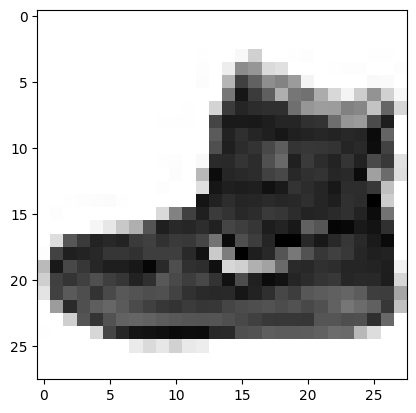

In [3]:
plt.imshow(X_train[0], cmap='Greys')

In [4]:
y_train[0]

np.uint8(9)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

<h3 style='color:purple'>Normalize training data before training the neural net</h3>

In [7]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

---
<h1>สร้างโมเดลโดยใช้โครงสร้างแบบ ANN</h1>


In [8]:
ANN_model = keras.Sequential()
ANN_model.add(keras.layers.Flatten(input_shape=[28, 28]))
ANN_model.add(keras.layers.Dense(100, activation="relu"))
ANN_model.add(keras.layers.Dense(10, activation="softmax"))

c:\Users\acezg\.conda\envs\cs461\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
ANN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
ANN_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [11]:
history_ANN_model = ANN_model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7794 - loss: 0.6358
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8624 - loss: 0.3846
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8755 - loss: 0.3406
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8833 - loss: 0.3174
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8899 - loss: 0.3010


In [12]:
ANN_model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8808 - loss: 0.3414


[0.3496483564376831, 0.8787000179290771]

In [13]:
im=X_test_scaled[0:5,:,:]

In [14]:
prediction_result=ANN_model.predict(im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [15]:
prediction_result

array([[2.85868373e-06, 1.24629889e-08, 3.97268963e-07, 2.26900454e-08,
        1.09292209e-07, 2.62014996e-02, 6.79560253e-06, 5.76114468e-02,
        4.16799157e-05, 9.16135252e-01],
       [4.07918969e-06, 1.79408188e-09, 9.94452178e-01, 7.78816595e-11,
        5.26837585e-03, 7.46070566e-11, 2.75411236e-04, 1.04217999e-13,
        8.42566550e-09, 2.77421367e-11],
       [2.94284814e-06, 9.99997020e-01, 2.14424496e-08, 1.85117148e-08,
        1.00931929e-08, 5.94329002e-13, 5.64291236e-09, 1.94924516e-17,
        6.19465937e-11, 2.52975982e-15],
       [8.68608879e-07, 9.99996543e-01, 5.95205982e-08, 2.32640969e-06,
        1.03900334e-07, 8.32591808e-12, 1.65575855e-08, 3.34043452e-15,
        1.99411404e-10, 7.39328141e-13],
       [3.54744606e-02, 1.28955080e-05, 5.97053245e-02, 6.86142594e-03,
        2.78775189e-02, 1.32458335e-05, 8.69334877e-01, 3.96793666e-06,
        6.89058972e-04, 2.72421075e-05]], dtype=float32)

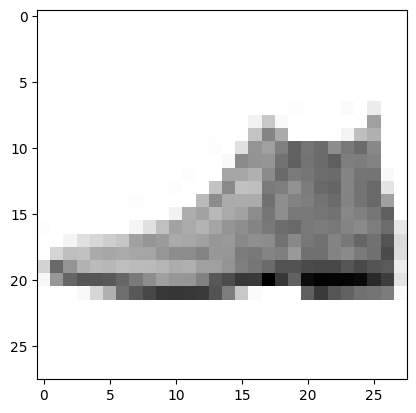

In [16]:
plt.imshow(X_test[0], cmap='Greys')

In [17]:
np.argmax(prediction_result[0,:])

np.int64(9)

In [18]:
ANN_model.save('ANN_fasion_mnist.keras')

---
<h1>สร้างโมเดลโดยใช้โครงสร้างแบบ CNN</h1>

In [19]:
CNN_model = keras.Sequential()


##### ตัวอย่าง Convolution Layer with RELU activation function and Pooling Layer(Max pooling)#####
CNN_model.add(keras.layers.Conv2D(
    filters=5, # How many filters we will learn
    kernel_size=(3, 3), # Size of filters
    strides=(1, 1), # How the filter "steps" across the image
    activation='relu', # Rectified Linear Unit Activation Function
    input_shape=(28, 28, 1) # The expected input shape for this layer
))

CNN_model.add(keras.layers.MaxPooling2D(
    pool_size=(2, 2), # Size feature will be mapped to
    strides=(2, 2) # How the pool "steps" across the feature
))




##### Flatten Layer #####


##### Fully Connected Layer #####


c:\Users\acezg\.conda\envs\cs461\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
CNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 5)      │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 5)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50 (200.00 B)

 Trainable params: 50 (200.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
CNN_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [22]:
history_CNN_model = CNN_model.fit(X_train, y_train, epochs=5)

Epoch 1/5


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32,), output.shape=(32, 13, 13, 5)

In [ ]:
CNN_model.evaluate(X_test, y_test)

In [ ]:
CNN_model.save('CNN_fasion_mnist.keras')

---
<h1>เปรียบเทียบโมเดลแบบ CNN และ ANN </h1>

In [ ]:
history_CNN_model.history.keys()

In [ ]:
history_ANN_model.history.keys()

In [ ]:
plt.plot(history_CNN_model.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
plt.plot(history_ANN_model.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')